# Important Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\\downloads\\amazon.csv")  # Imported the data as df

# Data Overview

In [3]:
df.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...


This is an Amazon Sales Dataset, it contains information on 1k+ Amazon products, including their ratings, reviews, and other details

# Data Cleaning

1. Columns such as rating, rating_count, discounted_price and actual_price are objects which have to be converted to numeric to effectivly analyse the data.
2. Null value treatment
3. Image_link and Product_link column has to be removed as they do not surve any purpose to analyses.
4. The category column is more like a keywords column. So, it will be devided into two columns, which are category and keyword to get better insight out of it.

In [4]:
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [5]:
# Made necessary changes to the columns which were causing issue 
df['rating'].replace(to_replace= {'|':0}, inplace = True)
df['rating_count'] = df['rating_count'].str.replace('[,]','', regex = True)
df['discounted_price'] = df['discounted_price'].str.replace('[₹,]',"", regex = True)
df['discount_percentage'] = df['discount_percentage'].str.replace('[%]',"", regex = True)
df['actual_price'] = df['actual_price'].str.replace('[₹,]',"", regex = True).astype(float)

# Converted the columns to numeric 
df['rating'] = pd.to_numeric(df['rating'], errors = 'coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors = 'coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors = 'coerce')
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors = 'coerce')
df['actual_price'] = df['actual_price'].astype(float)

In [6]:
# Checking for null values
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [7]:
df.dropna(inplace = True) # since there are only two null values we can drop those

In [8]:
df['keywords'] = df['category']

In [9]:
# This function helps in extracting the core categories of the product
def extract_category(row):
    if 'Home&Kitchen' in row:
        return 'Home&Kitchen'
    elif 'Computers&Accessories' in row:
        return 'Computers&Accessories'
    elif 'Electronics' in row:
        return 'Electronics'
    elif 'OfficeProducts' in row:
        return 'OfficeProducts'
    elif 'HomeImprovement' in row:
        return 'HomeImprovement'
    elif 'Car&Motorbike' in row:
        return 'Car&Motorbike'
    elif 'Health&PersonalCare' in row:
        return 'Health&PersonalCare'
    elif 'Toys&Games' in row:
        return 'Toys&Games'
    else:
        return 'MusicalInstruments'

# Overriting the category column with the help of defined function 
df['category'] = df['category'].apply(extract_category)

In [10]:
df.drop({'product_link','img_link'},axis = 1, inplace = True) # Dropped these as they are of no use in analysis

In [11]:
df.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,keywords
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,Computers&Accessories|Accessories&Peripherals|...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,Computers&Accessories|Accessories&Peripherals|...


# Exploratory Data Analysis

__Average rating for each product category__

In [12]:
df.groupby(['category'])['rating'].mean().to_frame().sort_values(by = 'rating', ascending = False)

,rating
category,
Toys&Games,4.300000
OfficeProducts,4.288889
HomeImprovement,4.250000
Computers&Accessories,4.155654
Electronics,4.084528
Home&Kitchen,4.031696
Health&PersonalCare,4.000000
MusicalInstruments,3.900000
Car&Motorbike,3.800000


Insights:
1. Toys&Games and OfficeProducts have the highest average ratings at 4.30 and 4.29, respectively. This suggests that customers are generally very satisfied with products in these categories.
2. Car&Motorbike and MusicalInstruments have the lowest average ratings at 3.80 and 3.90, respectively. This suggests that customers are less satisfied with products in these categories. It can be reduced through quality improvements, better product descriptions, enhanced customer service, or addressing specific customer complaints to boost satisfaction.

__Top rating count products by category__

In [13]:
df.groupby(['category','product_name'])['rating_count'].sum().to_frame().sort_values(by = 'rating_count',ascending = False)

rating_count
category     product_name                                                    
Electronics  AmazonBasics Flexible Premium HDMI Cable (Black...      853945.0
             Amazon Basics High-Speed HDMI Cable, 6 Feet - S...      426973.0
             Amazon Basics High-Speed HDMI Cable, 6 Feet (2-...      426973.0
             JBL C100SI Wired In Ear Headphones with Mic, JB...      385177.0
             boAt Bassheads 100 in Ear Wired Earphones with ...      363713.0
...                                                                       ...
Home&Kitchen VAPJA® Portable Mini Juicer Cup Blender USB Rec...           4.0
             Longway Blaze 2 Rod Quartz Room Heater (White, ...           4.0
             Lifelong LLQH925 Dyno Quartz Heater 2 Power set...           4.0
             NGI Store 2 Pieces Pet Hair Removers for Your L...           2.0
             Khaitan ORFin Fan heater for Home and kitchen-K...           2.0

[1335 rows x 1 columns]

This data will help in identifying, among different categories which products are most popular ones

__Relationship between discount percentage and actual price__

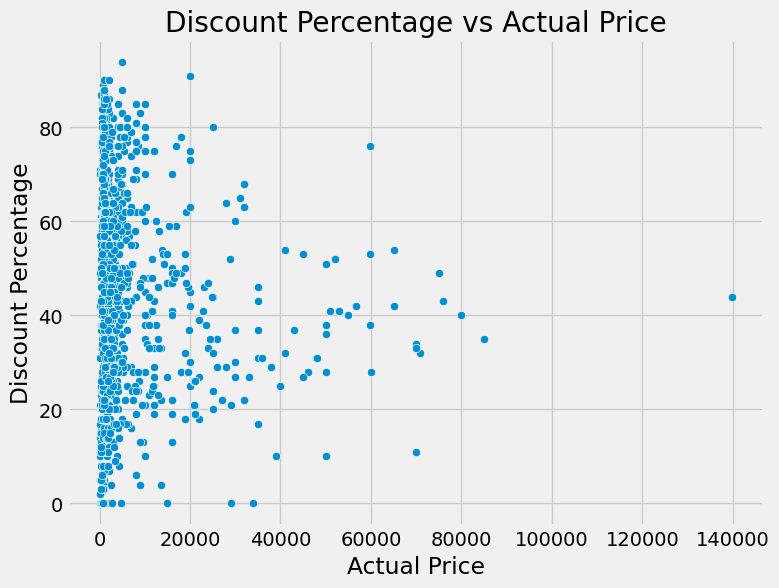

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='actual_price', y='discount_percentage', data=df)
plt.title('Discount Percentage vs Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Discount Percentage')
plt.show()

In [15]:
df['discount_percentage'].corr(df['actual_price'])

-0.11749413051731969

Statistically we can not say that there is any direct relationship between price of the product and discount percentage. Although they are negatively correlated but the value is considerably low i.e -0.11 (this mean if actual price increases there is only 11% chance that discount percentage will decrease. 

__Price Distribution__

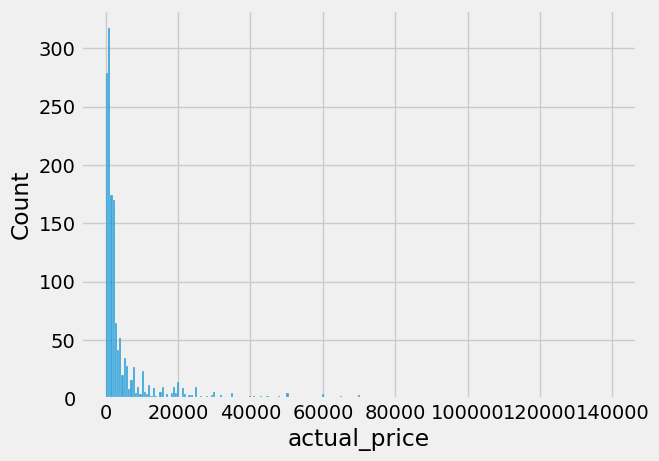

Majority of the products are below Rs.2000
Most of the products are priced @ Rs.999.0


In [67]:
sns.histplot(df['actual_price'])
plt.show()
print(f"Majority of the products are below Rs.2000\nMost of the products are priced @ Rs.{statistics.mode(df['actual_price'])}")

__How does the average discount percentage vary across categories__

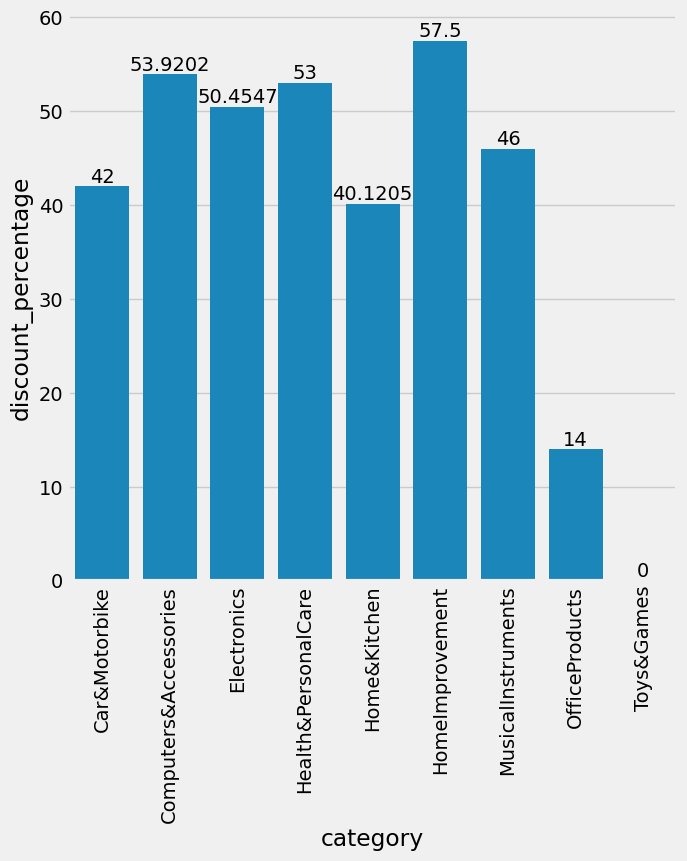

In [16]:
# First make a saperate dataframe containing avg discount percentage for each category
avg_discount_data = df.groupby('category')['discount_percentage'].mean().to_frame().reset_index()

# Visualization of same on a bar plot
plt.figure(figsize = (7,7))
ax = sns.barplot(x = avg_discount_data['category'], y = avg_discount_data['discount_percentage'])
for bars in ax.containers:
  ax.bar_label(bars)
plt.xticks(rotation=90, ha='center')
plt.show()

Insights:
1. HomeImprovement: This category has the highest average discount at 57.5%. This suggests that products in this category might often be heavily discounted, possibly to attract more customers or to clear out inventory.
3. Toys&Games: With a 0% discount, this category shows no discounts being offered. This could imply either a very high demand where discounts are not needed, or a pricing strategy that does not rely on discounts to drive sales.

__Top 10 popular product names__

In [17]:
df.groupby(['product_name'])['rating_count'].sum().to_frame().sort_values(by = 'rating_count', ascending = False)[:10]

,rating_count
product_name,
"AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot",853945.0
"Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black",426973.0
"Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black",426973.0
"JBL C100SI Wired In Ear Headphones with Mic, JBL Pure Bass Sound, One Button Multi-function Remote, Angled Buds for Comfort fit (Black)",385177.0
boAt Bassheads 100 in Ear Wired Earphones with Mic(Taffy Pink),363713.0
boAt Bassheads 100 in Ear Wired Earphones with Mic(Furious Red),363713.0
boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black),363711.0
"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage) | Octa-core Helio G35 | 5000 mAh Battery",313836.0
"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Storage) | 2GHz Octa-core Helio G25 Processor | 5000 mAh Battery",313836.0


It is clear from the above data that all the top 10 popular products are from Electronics and Computer&Accessoris category. The organisation should make sure that they always have enough stock available, so that they can meet the higher demand of these products. 

__Top 5 popular keywords__

In [18]:
df.groupby(['keywords'])['rating_count'].sum().to_frame().sort_values(by= 'rating_count', ascending = False)[:5]

,rating_count
keywords,
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",4204939.0
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,3547816.0
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,2493269.0
"Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",1906054.0
Electronics|WearableTechnology|SmartWatches,1644476.0


__Top 5 popular product reviews__

In [19]:
df['review_title'].value_counts().to_frame()[:5]

,count
review_title,
"Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.",10
"Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good",8
"Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good",8
"Good product,Good one,Nice,Really nice product,Very first time change,Good,Fine product but could be better,Very nice it's charging like jet",7
"A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good product,its good,Good quality for the price but one issue with my unit",7


__Correlation between discounted_price and rating__

In [20]:
df['discounted_price'].corr(df['rating'])

0.11494691129701481

Discounted price and rating have a considerably week correlation, here we can say that if there will be any change in discounte_price there is approx 11% chance that there will be a positive change in rating too.

__Top 5 categories based on highest ratings__

In [21]:
df.groupby(['category'])['rating'].max().to_frame().sort_values(by = 'rating', ascending= False)[:5]

,rating
category,
Computers&Accessories,5.0
Home&Kitchen,4.8
Electronics,4.7
HomeImprovement,4.5
OfficeProducts,4.5


Highest rated products are from Computer & Accessories category i.e. 5 rated followed by Home & Kitchen and Electronics